In [1]:
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import xlwt
from heapq import *

from EM import *

In [2]:
stemmer = SnowballStemmer("english")

In [3]:
df = pd.read_csv("NIPS_1987-2015.csv", sep=',', index_col = 0)

In [4]:
df.shape

(11463, 5811)

B = 11463 words (corresponds to rows) ; L = 5811 texts (corresponds to columns)

In [14]:
#df

In [43]:
dfTranspose = df.transpose()

In [44]:
from heapq import *

wordOccurrences=  dfTranspose.sum(0)
max(wordOccurrences)
np.argmax(wordOccurrences)
wordOccurrences['use']
nlargest(3, wordOccurrences)
wordOccurrences = wordOccurrences.nlargest(300)
type(wordOccurrences)
usedWords = list(wordOccurrences.index.values)
data = dfTranspose.ix[:, usedWords]

In [15]:
dicDf = df.transpose().to_dict(orient = 'list')

In [16]:
stemDf = {}
for key in dicDf.keys():
    if type(key) == str:
        #print "Key is not nan"
        stemWord = str(stemmer.stem(key))
        #print "Stemmed word! " + stemWord
        if stemWord not in stemDf.keys():
            stemDf[stemWord] = dicDf[key]
        elif stemWord in stemDf.keys():
            #print "Key already in new dictionary"
            #print "Last values in dicDf: " + str(dicDf[key])
            #print "Last values in stemDf: " + str(stemDf[stemWord])
            stemDf[stemWord] = list(np.array(stemDf[stemWord]) + np.array(dicDf[key]) )
            #print "New values in stemDf: " + str(stemDf[stemWord])
    

In [17]:
Df = pd.DataFrame.from_dict(stemDf)

In [22]:
Df

,ab,abalon,abbeel,abbott,abbrevi,abc,abel,abernethi,abil,abilist,...,zhou,zhu,zien,zilberstein,zone,zoo,zoom,zou,zoubin,zurich
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Df is the transpose of df

L = 5811 (texts)
B = 7119 (words) --> used a stemmer to reduce the number of words and accelerate the analysis

In [18]:
n = float(Df.sum().sum())
n

11040282.0

In [19]:
def perc(row):
    lenDoc = sum(row)
    #print lenDoc
    if lenDoc == 0:
        print "Warning: this document is inexistant"
    return [max(u / float(lenDoc) , 1/n) for u in row]

In [20]:
def nullArticlesIndexes(Df):
    indexes = []  
    for i in range(len(Df)):
        #print sum(Df.ix[i,])
        if sum(Df.ix[i,]) == 0:
            print "Null row"
            print i
            indexes.append(i)
    return indexes
        

In [21]:
indexes = nullArticlesIndexes(Df)

Null row
2452
Null row
3277
Null row
4062
Null row
4099
Null row
4204
Null row
4228
Null row
5595


In [45]:
indexes = nullArticlesIndexes(dfTranspose)

Null row
2452
Null row
3277
Null row
4062
Null row
4099
Null row
4204
Null row
4228
Null row
5595


In [23]:
Df.drop(Df.index[indexes], inplace = True)

In [46]:
dfTranspose.drop(dfTranspose.index[indexes], inplace = True)

Here, empty articles are cleaned from the data

In [25]:
Df.shape

(5804, 7119)

Now, average the values of the histograms

In [26]:
Df2 = Df.apply(perc, axis=1)

In [ ]:
Df2 = dfTranspose.apply(perc, axis=1)

In [27]:
from heapq import *

wordOccurrences=  Df2.sum(0)
max(wordOccurrences)
np.argmax(wordOccurrences)
wordOccurrences['use']
nlargest(3, wordOccurrences)
wordOccurrences = wordOccurrences.nlargest(300)
type(wordOccurrences)
usedWords = list(wordOccurrences.index.values)
data = Df2.ix[:, usedWords]

In [28]:
thresholdConvergence = 1
epsilon = .01
deltaInit = 0
L = len(Df)
B = 300
K = 10
data = data.values

Runninng of EM on selected model via Jump method : K = 33

In [39]:
print ("NEW NUMBER OF CLUSTERS : " ,10)
P,Pi,Rpost,logScore,logScores = expectationMaximisation2(data, 10, L, B, thresholdConvergence, 200)

('NEW NUMBER OF CLUSTERS : ', 10)
1-th short run of EM
('Average histogram: ', array([ 0.01145255,  0.0109733 ,  0.00849689,  0.00750141,  0.0072482 ,
        0.00722576,  0.0064083 ,  0.00586813,  0.00527293,  0.00502779,
        0.00496341,  0.00490363,  0.004625  ,  0.00451176,  0.00447848,
        0.00432086,  0.00416875,  0.00401355,  0.00397862,  0.00386685,
        0.00367259,  0.00366565,  0.00347864,  0.00347112,  0.00346931,
        0.00344419,  0.00342902,  0.00329226,  0.00328429,  0.00324523,
        0.0032372 ,  0.00321103,  0.00320587,  0.00316491,  0.00309666,
        0.00309587,  0.00305543,  0.0030554 ,  0.00304962,  0.00302906,
        0.00302611,  0.00302254,  0.00297937,  0.00297017,  0.00295793,
        0.00293096,  0.00289716,  0.0028413 ,  0.00279786,  0.00274002,
        0.00269209,  0.00258394,  0.00252478,  0.0024882 ,  0.00240253,
        0.00237713,  0.00235302,  0.00230545,  0.00228869,  0.0022859 ,
        0.00224237,  0.00222576,  0.00220529,  0.00220522

In [47]:
Pi

array([[ 0.07009919],
       [ 0.14848834],
       [ 0.10083938],
       [ 0.1536169 ],
       [ 0.09622059],
       [ 0.00634981],
       [ 0.20574846],
       [ 0.00168406],
       [ 0.10399796],
       [ 0.11295531]])

In [48]:
groups = np.argmax(Rpost, axis=1)

In [49]:
for i in groups:
    print i

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


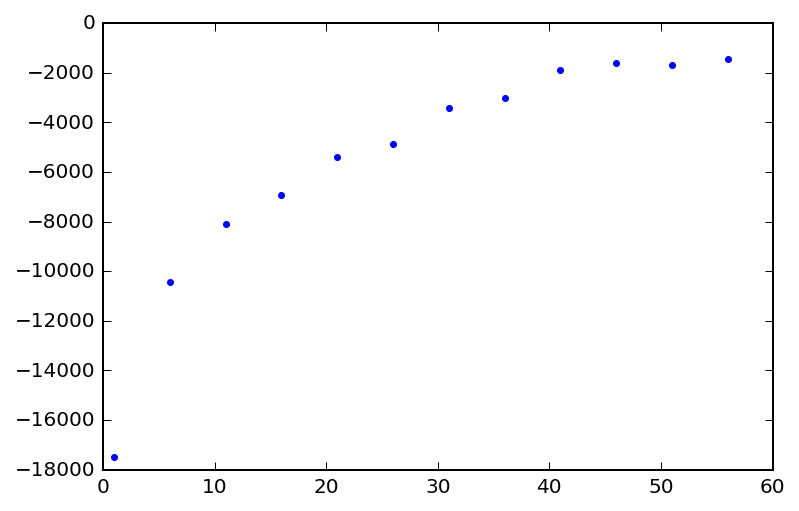

In [64]:
plt.plot(range(1,60,5), logKClusters, '.')

In [16]:
style0 = xlwt.easyxf('font: name Times New Roman, color-index red, bold on',
    num_format_str='#,##0.00')
style1 = xlwt.easyxf(num_format_str='D-MMM-YY')

wb = xlwt.Workbook()
ws = wb.add_sheet('EM on multinomials')

In [17]:
ws.write(0, 0, "model")
ws.write(0, 1, "pen shape")
ws.write(0, 2, "model complexity")
ws.write(0, 3, "contrast")

In [18]:
wb.save('Model Selection Data for CAPUSHE - increasing.xls')

In [ ]:
logKClusters = []
modelNumber = 1
for k in range(1,100,1):
    ws.write(modelNumber, 0, "K = " + str(k))
    ws.write(modelNumber, 1, k*B -1)
    ws.write(modelNumber, 2, k*B -1)

    print ("NEW NUMBER OF CLUSTERS : " ,k)
    P,Pi,Rpost,logScore,logScores = expectationMaximisation2(data, k, L, B, thresholdConvergence, 200)
    if len(logKClusters) == 0: 
        ws.write(modelNumber, 3, - logScore)
    else:
        ws.write(modelNumber, 3, - max(logScore, max(logKClusters)))
    
    wb.save('Model Selection Data for CAPUSHE - increasing.xls')
    modelNumber +=1
    logKClusters.append(logScore)

In [20]:
wb.save('Model Selection Data for CAPUSHE - increasing.xls')

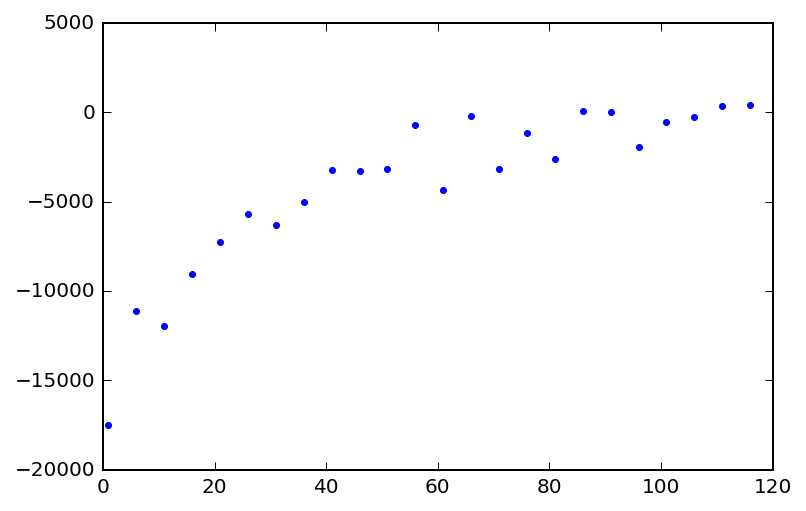

In [70]:
plt.plot(range(1,120,5), logKClusters, '.')

In [46]:
# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import numpy as np
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

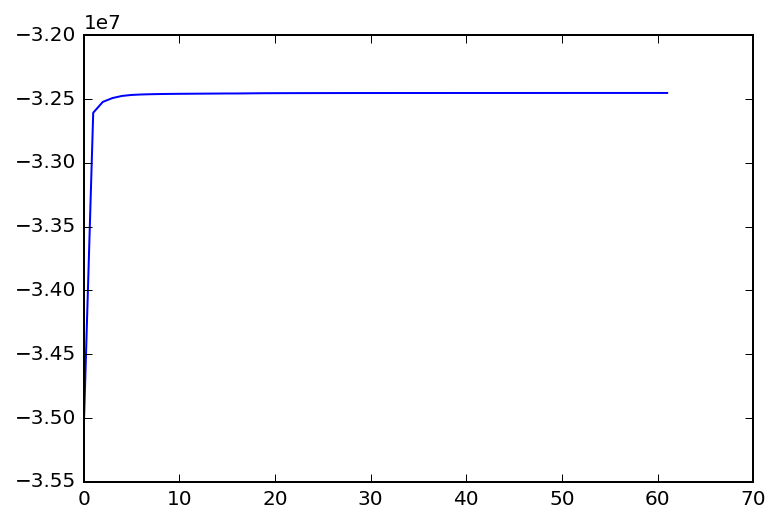

In [78]:
import matplotlib.pyplot as plt
plt.plot(range(len(logScores)), logScores)

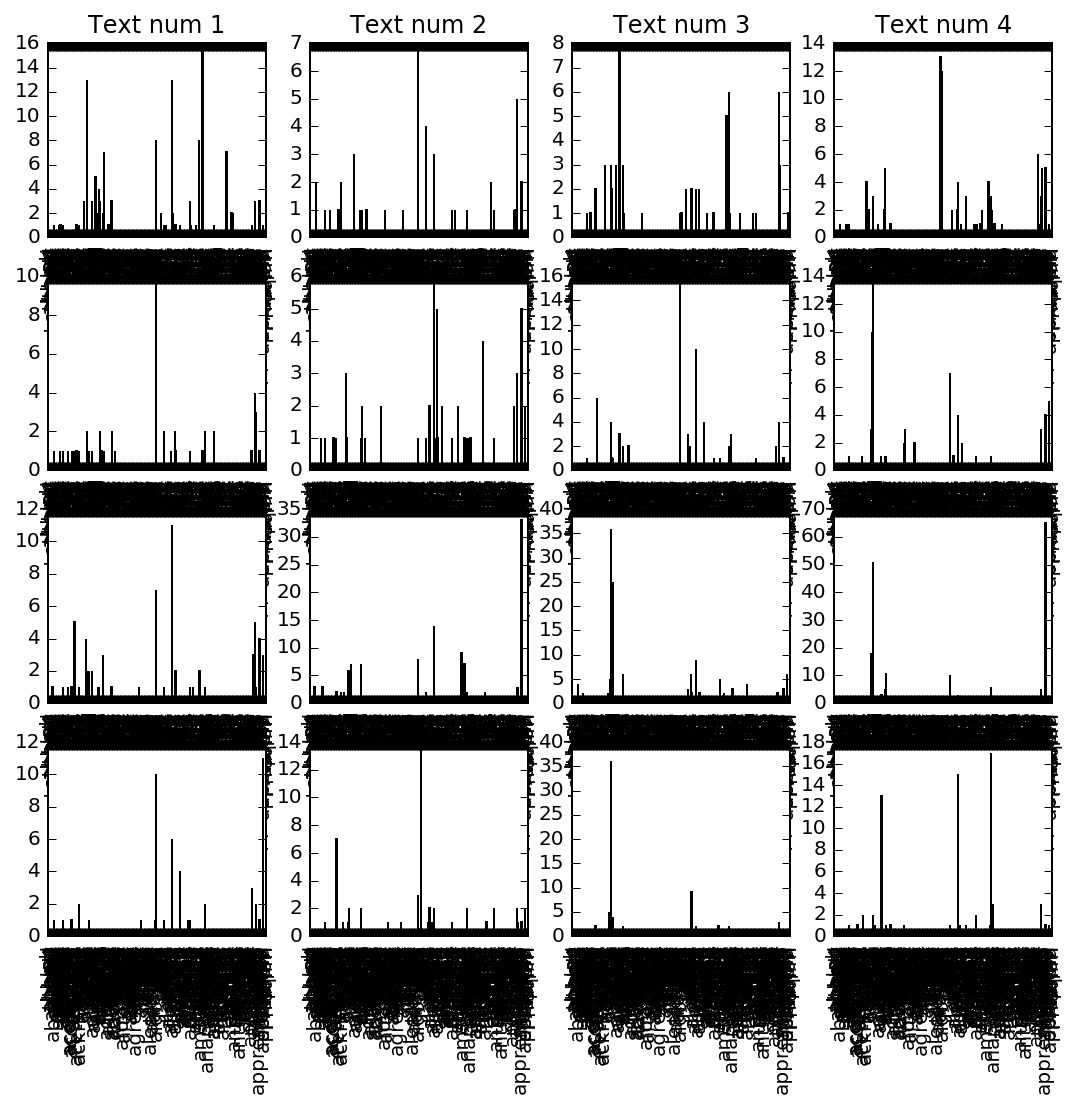

In [55]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, 17):
    fig.add_subplot(4,4,k)
    Df.ix[k][0:300].plot.bar()
    plt.axhline(0, color='k')
    plt.title("Text num " + str(k))